In [2]:
import pandas as pd
import numpy as np
import torch

from models.SP import SP
from models.ADP import ADP
from models.I import I

from utils.parse_data import parse_paper_data
from utils.preprocess_data import process_raw

In [3]:
paper1_columns = ['Name', 'q1', 'q2', 'q3',
                      'q4', 'q5', 'q6', 'q7', 'q8', 'q9', 'q10', 'q11', 'q12', 'q13', 'q14',
                      'q15', 'q16', 'q17', 'q18', 'q19', 'q20', 'q21', 'q22', 'q23', 'q24']
paper2_columns = ['Name.1', 'q1.1', 'q2.1', 'q3.1',
                    'q4.1', 'q5.1', 'q6.1', 'q7.1', 'q8.1', 'q9.1', 'q10.1', 'q11.1',
                    'q12.1', 'q13.1', 'q14.1', 'q15.1', 'q16.1', 'q17.1', 'q18.1', 'q19.1',
                    'q20.1', 'q21.1', 'q22.1', 'q23.1']
paper3_columns = ['Name.2', 'q1.2', 'q2.2', 'q3.2', 'q4.2', 'q5.2', 'q6.2',
                    'q7.2', 'q8.2', 'q9.2', 'q10.2', 'q11.2', 'q12.2', 'q13.2', 'q14.2',
                    'q15.2', 'q16.2', 'q17.2', 'q18.2', 'q19.2', 'q20.2', 'q21.2', 'q22.2',
                    'q23.2']

csv_path = "Fwd__Pinpoint_ML_Dataset\9to1_2017_GCSE_1H_and_2H_and_3H Linked Pinpoint Data_Cleaned.csv"
raw_data = pd.read_csv(csv_path, low_memory=False)
data_start_row = 6

# Process data
exam_data_df, meta_data_df = parse_paper_data(raw_data, data_start_row, paper1_columns)
exam_data_df, _ = process_raw(exam_data_df, meta_data_df, binarise_method='mid', shuffle=True)

exam_data_df2, meta_data_df2 = parse_paper_data(raw_data, data_start_row, paper2_columns)
exam_data_df2, _ = process_raw(exam_data_df2, meta_data_df2, binarise_method='mid', shuffle=True)

combined_df = pd.concat([exam_data_df, exam_data_df2], axis=1)
combined_ts = torch.clone(torch.tensor(combined_df.values))

S, Q = combined_ts.shape[0], combined_ts.shape[1]

0 tensor(1515916.2500, grad_fn=<NegBackward0>) tensor(168435.4062, grad_fn=<NegBackward0>) 58.904314041137695
25 tensor(750379.3125, grad_fn=<NegBackward0>) tensor(83271.9688, grad_fn=<NegBackward0>) 65.51921367645264
50 tensor(735572.1250, grad_fn=<NegBackward0>) tensor(81798.0703, grad_fn=<NegBackward0>) 65.5541181564331
75 tensor(721610.2500, grad_fn=<NegBackward0>) tensor(80408.3203, grad_fn=<NegBackward0>) 65.81646800041199
100 tensor(708456.4375, grad_fn=<NegBackward0>) tensor(79099.1719, grad_fn=<NegBackward0>) 66.02705717086792
125 tensor(696072.7500, grad_fn=<NegBackward0>) tensor(77866.8984, grad_fn=<NegBackward0>) 66.16705656051636
150 tensor(684420.6875, grad_fn=<NegBackward0>) tensor(76707.7422, grad_fn=<NegBackward0>) 66.31489992141724
175 tensor(673462., grad_fn=<NegBackward0>) tensor(75617.9062, grad_fn=<NegBackward0>) 66.5015697479248
200 tensor(663158.6250, grad_fn=<NegBackward0>) tensor(74593.6875, grad_fn=<NegBackward0>) 66.73294305801392
225 tensor(653473.5000, gra

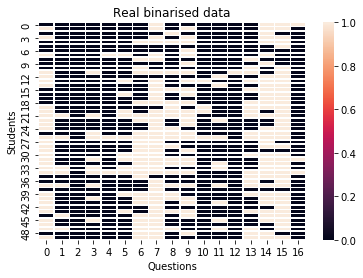

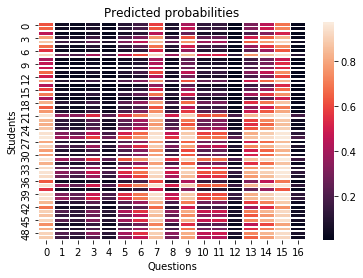

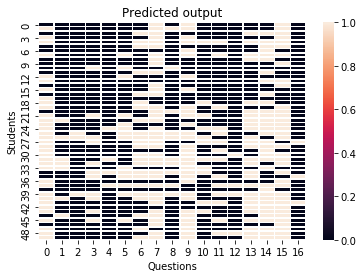

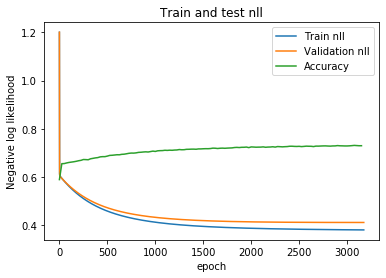

Interactive (rate=0.00025, iters=3175) -> accuracy: 73.0733335018158, confusion matrix: 
[[49.7427451  13.84980392]
 [13.07686275 23.33058824]]


In [4]:
my_I3 = I(combined_ts, [0, 15000], [30, Q])
my_I3.run(learning_rate=0.00025, iters=3175, dimension=3, validation=0.9)

0 tensor(1403218.5000, grad_fn=<NegBackward0>) tensor(156066.8438, grad_fn=<NegBackward0>) 59.09372568130493
25 tensor(750386.3750, grad_fn=<NegBackward0>) tensor(83268.1250, grad_fn=<NegBackward0>) 65.32823443412781
50 tensor(735579.6875, grad_fn=<NegBackward0>) tensor(81794.4844, grad_fn=<NegBackward0>) 65.50549268722534
75 tensor(721618.3125, grad_fn=<NegBackward0>) tensor(80404.8047, grad_fn=<NegBackward0>) 65.70156812667847
100 tensor(708465.0625, grad_fn=<NegBackward0>) tensor(79095.7344, grad_fn=<NegBackward0>) 65.77333211898804
125 tensor(696081.8125, grad_fn=<NegBackward0>) tensor(77863.5391, grad_fn=<NegBackward0>) 66.08940958976746
150 tensor(684430.2500, grad_fn=<NegBackward0>) tensor(76704.4453, grad_fn=<NegBackward0>) 66.33803844451904
175 tensor(673472., grad_fn=<NegBackward0>) tensor(75614.6719, grad_fn=<NegBackward0>) 66.4572536945343
200 tensor(663169.2500, grad_fn=<NegBackward0>) tensor(74590.5156, grad_fn=<NegBackward0>) 66.8560802936554
225 tensor(653484.5625, grad

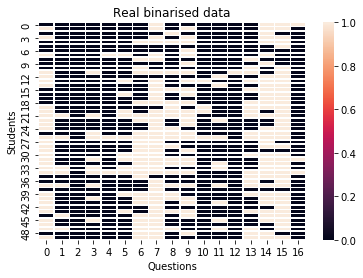

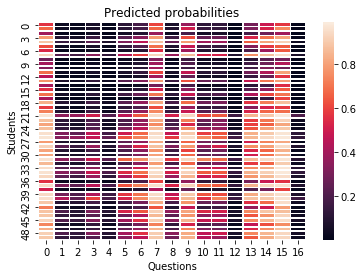

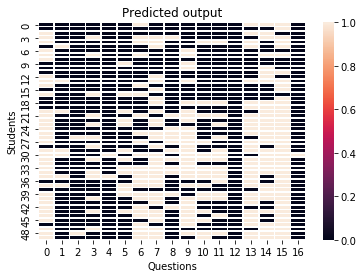

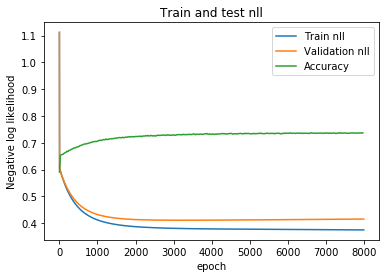

Interactive (rate=0.00025, iters=8000) -> accuracy: 73.66392016410828, confusion matrix: 
[[50.27058824 13.32196078]
 [13.01411765 23.39333333]]


In [5]:
my_I3_more = I(combined_ts, [0, 15000], [30, Q])
my_I3_more.run(learning_rate=0.00025, iters=8000, dimension=2, validation=0.9)